In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
import model.dataset.game_matchup as ds_games_matchup
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.set_option("display.max_rows", None)
from pandas_profiling import ProfileReport

In [4]:
games_matchup = ds_games_matchup.load_game_matchup_dataset()

In [5]:
df = games_matchup[games_matchup.SEASON >= 2008]

In [6]:
#profile = ProfileReport(games[games.SEASON>=2010], title='Pandas Profiling Report', explorative=True)
#profile

In [7]:
profile = ProfileReport(df, title='Pandas Profiling Report', pool_size=4,
                        minimal=True,
                        explorative=True,
                           correlations={
             "pearson": {"calculate": True},
             "spearman": {"calculate": False},
             "kendall": {"calculate": False},
             "phi_k": {"calculate": False},
             "cramers": {"calculate": False},
         })

In [8]:
profile

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

In [17]:
df = games_matchup[games_matchup.SEASON >= 2008]
models = []
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))) 
#models.append(('SVM', SVC(kernel = 'linear', random_state=0))) 
#models.append(('KSVM', SVC(kernel = 'rbf', random_state=0))) 
#models.append(('NB', GaussianNB())) 
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state=0))) 
models.append(("RF", RandomForestClassifier(n_estimators=500, 
                                            max_features="sqrt", 
                                            max_depth=15, 
                                            n_jobs=-1, 
                                            random_state = 0)))
#models.append(("GB", GradientBoostingClassifier(n_estimators=500, 
#                                                max_depth=15, 
#                                                max_features="sqrt", 
#                                                random_state = 0)))

# Ensemble method - collection of many decision trees

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=len(df.SEASON.unique())-1, max_train_size=15)
    utils.X_y_values(df)

    cv_results = cross_validate(model,
                                 utils.X,
                                 utils.y.ravel(),
                                 cv=tscv,
                                 scoring=['balanced_accuracy', 'precision', "recall"])
    results.append(cv_results)
    names.append(name)
    
    print('%s %s: %f (%f)' % ('balanced_accuracy', name, cv_results["test_balanced_accuracy"].mean()
                              , cv_results["test_balanced_accuracy"].std()))
    print('%s %s: %f (%f)' % ("precision", name, cv_results["test_precision"].mean()
                               , cv_results["test_precision"].std()))
    print('%s %s: %f (%f)' % ("recall", name, cv_results["test_recall"].mean()
                               , cv_results["test_recall"].std()))
    
    #model.fit(X=utils.X_train,y=utils.y_train.ravel())
    #y_pred = model.predict(utils.X_test)
    #print("Balanced accuracy score: {:.2f}%".format(100 * balanced_accuracy_score(utils.y_test, y_pred)))
    #print("Precision: {:.2f}%".format(100 * precision_score(utils.y_test, y_pred)))
    #print("Recall: {:.2f}%".format(100 * recall_score(utils.y_test, y_pred)))
    #print("-------------------------------------------------")
    



balanced_accuracy DT: 0.621635 (0.070020)
precision DT: 0.707793 (0.072917)
recall DT: 0.638796 (0.132073)
balanced_accuracy RF: 0.591940 (0.048278)
precision RF: 0.655157 (0.042523)
recall RF: 0.797533 (0.141142)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fde34a46790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdde2da48d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdde2daa910>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdde2da33d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdde2da3910>,
 'means': []}

Text(0.5, 1.0, 'test_balanced_accuracy')

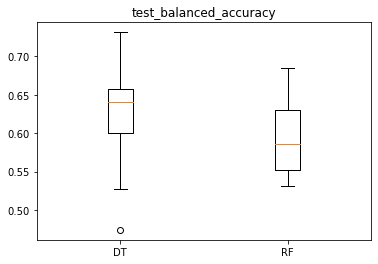

In [30]:
# Compare Algorithms\n",

plt.boxplot([results[0]["test_balanced_accuracy"], results[1]["test_balanced_accuracy"]], labels=names)
plt.title('test_balanced_accuracy')
plt.show()

In [28]:
len(results[0]["test_balanced_accuracy"])

10

In [12]:
#splits = np.arange(0, len(results[0]), 1)
from sklearn.metrics import SCORERS
sorted(SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
plt.plot(splits, results[0])
plt.show()

In [ ]:
plt.plot(splits, results[1])
plt.show()